# #Task-2

# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Dataset: "Heart Disease"
(Available from UCI Machine Learning Repository)

In [1]:
import pandas as pd

In [2]:
# Define column names as the dataset does not include header
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [3]:
# Load the Heart Disease dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_df = pd.read_csv(url, names=column_names, na_values='?')

In [4]:
# Display the first few rows of the dataset
print(heart_df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [5]:
# Display basic information about the dataset
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


In [6]:
# Display summary statistics
print(heart_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [7]:
# Check for missing values
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [8]:
# Fill missing values with median (for demonstration purposes)
heart_df = heart_df.fillna(heart_df.median())

In [9]:
# Check for missing values again to confirm
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


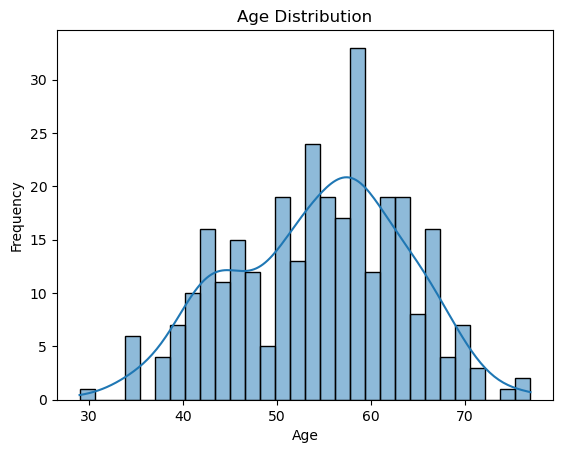

In [10]:
#Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age Distribution
sns.histplot(heart_df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Inference: The highest frequency of heart disease occurs to people in their late 50s.

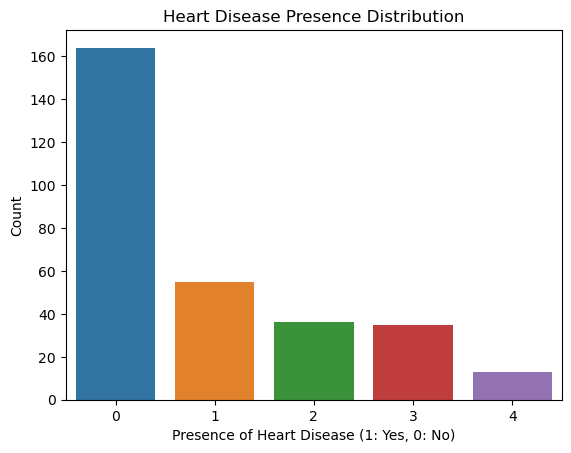

In [11]:
# Bar Chart for Target Distribution (presence of heart disease)
sns.countplot(x='target', data=heart_df)
plt.title('Heart Disease Presence Distribution')
plt.xlabel('Presence of Heart Disease (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

The 0 category (no heart disease) has the highest count, indicating that most individuals in the dataset do not have heart disease. The 1, 2, 3, and 4 categories represent different severity levels of heart disease, with decreasing frequencies.

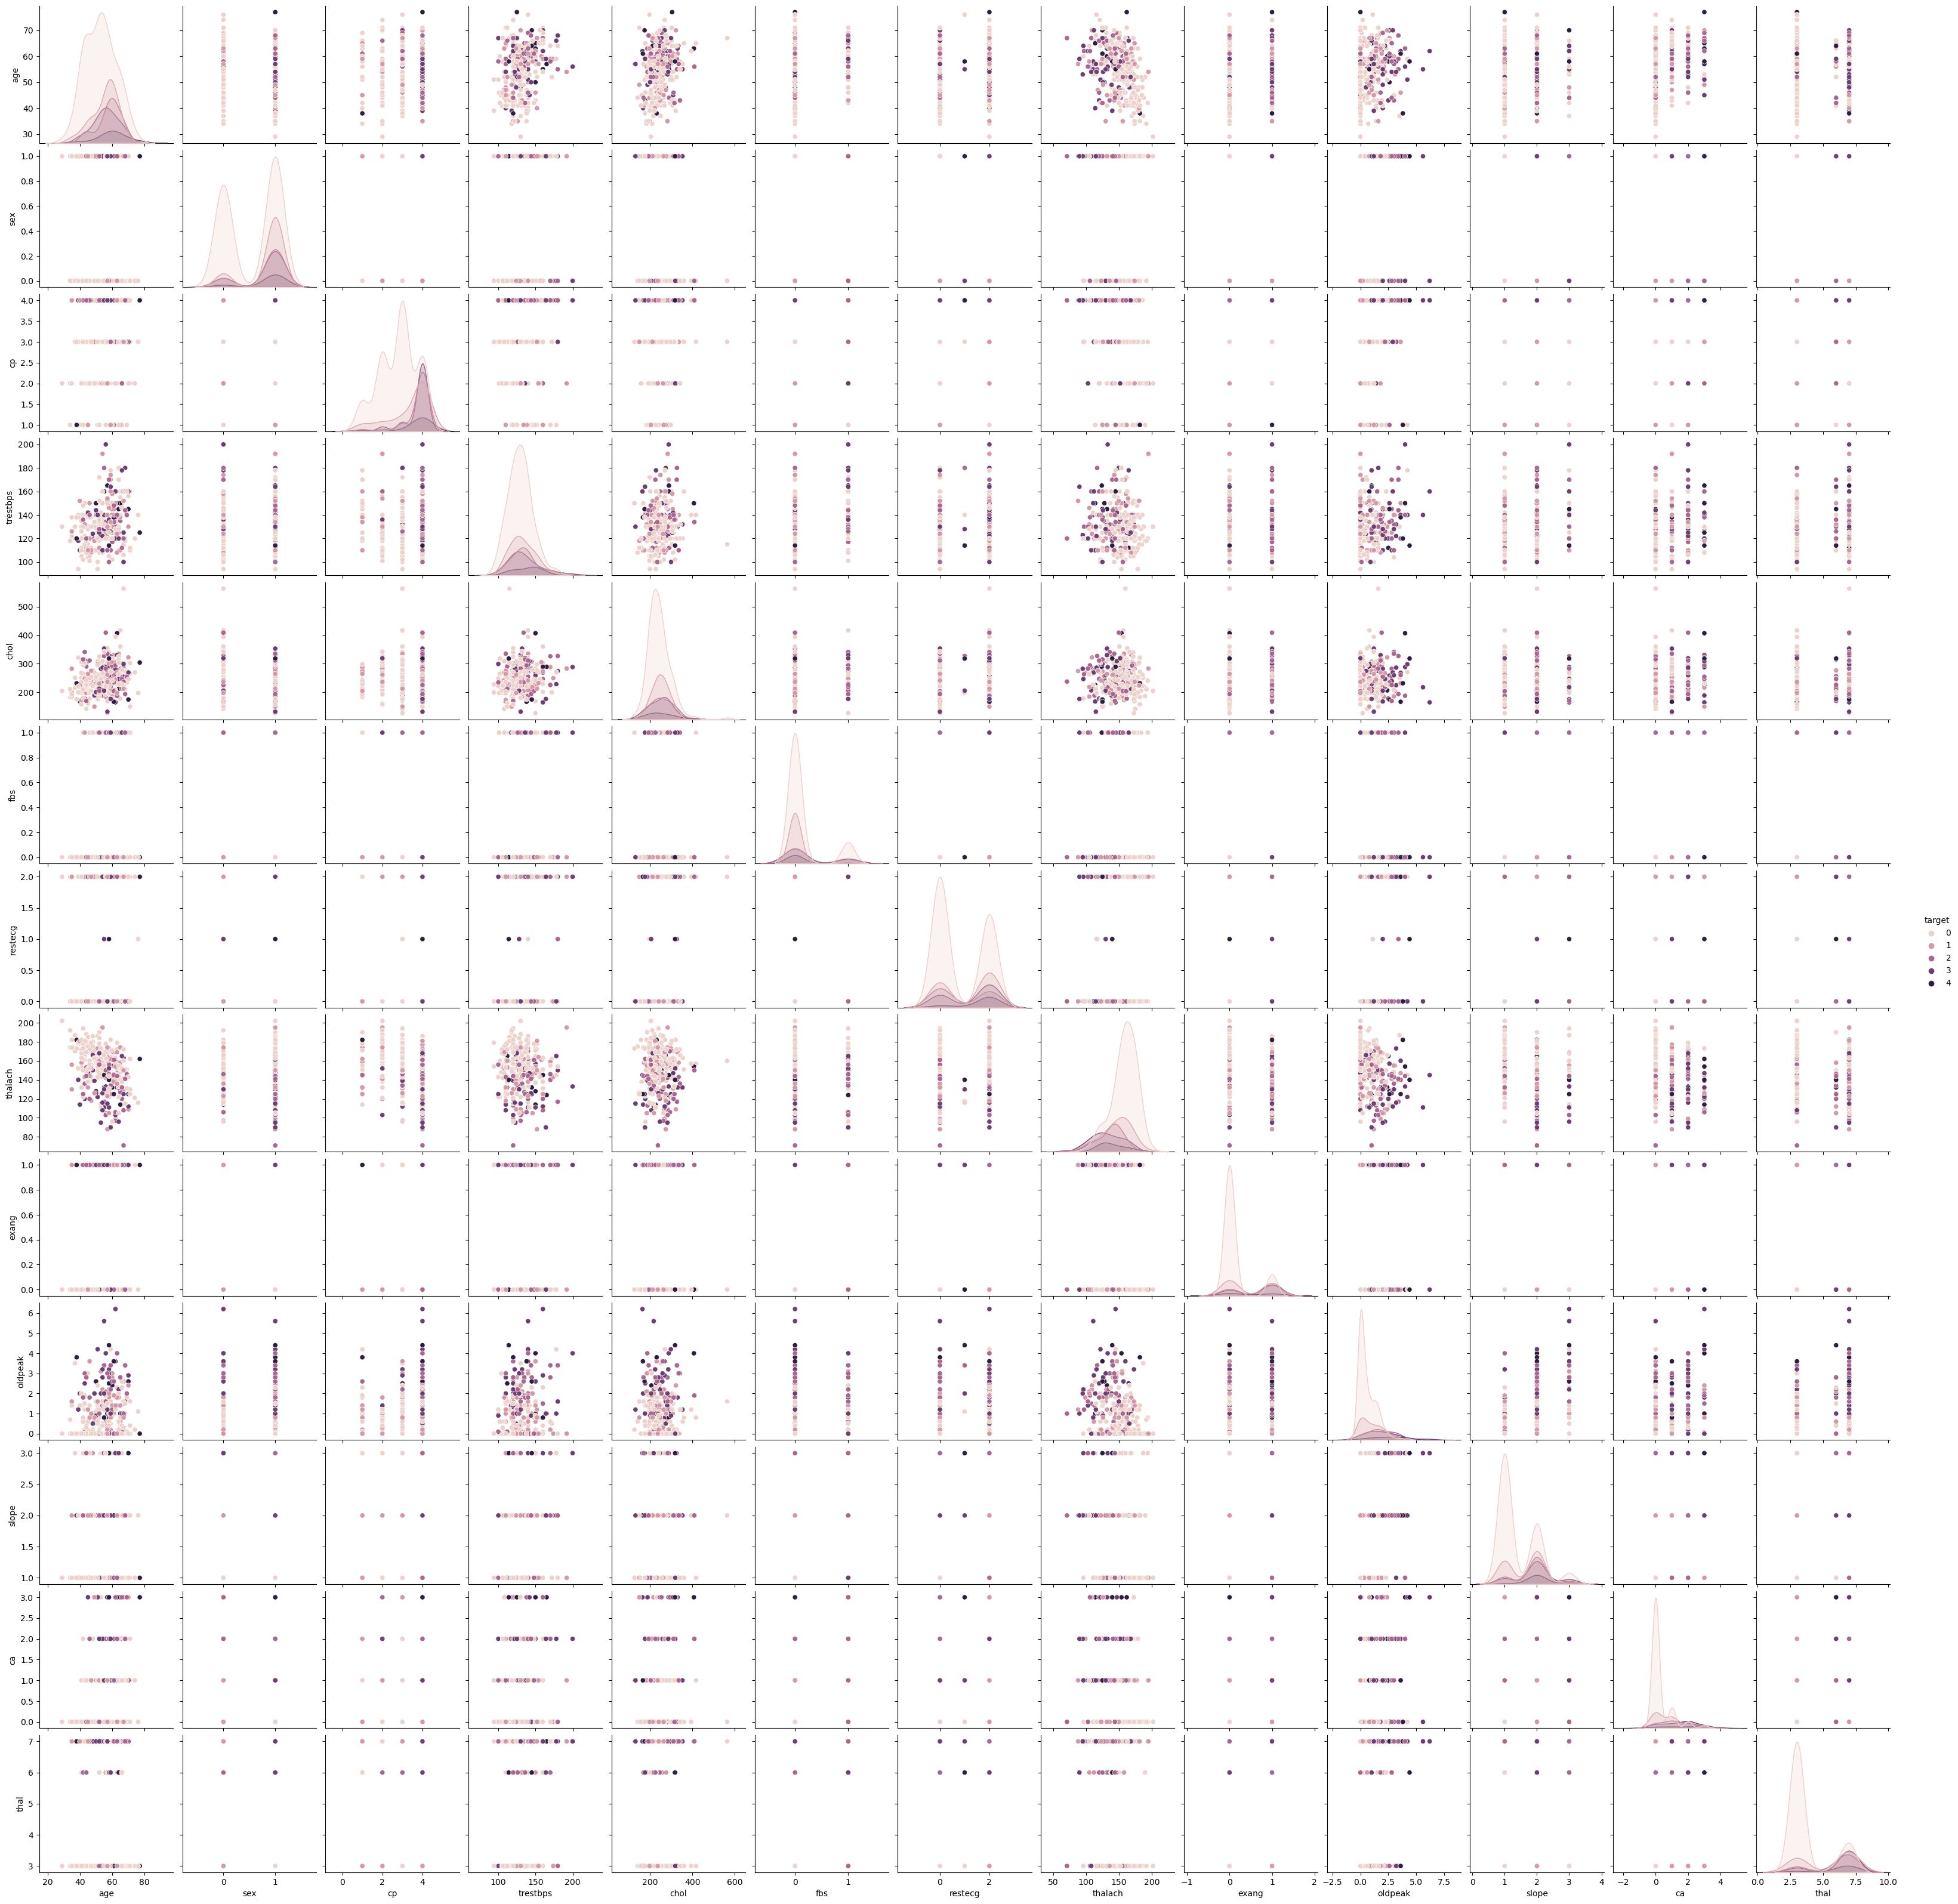

In [12]:
# Pairplot to explore relationships between features (including target)
sns.pairplot(heart_df, hue='target')
plt.show()

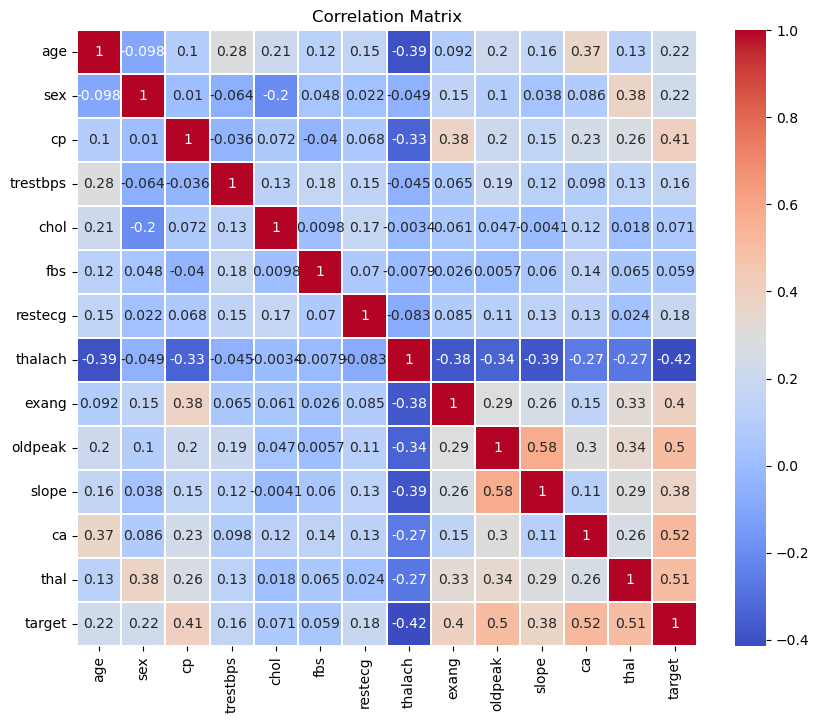

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

# Key Observations

1. Strong Positive Correlations with Target (Presence of Heart Disease):

- ca (number of major vessels colored by fluoroscopy): This feature has a strong positive correlation (0.52) with the target variable, indicating that a higher number of major vessels is associated with the presence of heart disease.
- thal (thalassemia): This feature also shows a strong positive correlation (0.51) with the target variable, suggesting a higher thalassemia score is linked with heart disease.
- oldpeak (ST depression induced by exercise relative to rest): This feature has a positive correlation (0.5) with the target, indicating that higher ST depression levels are associated with heart disease.
- exang (exercise-induced angina): This feature has a positive correlation (0.4) with the target, showing that exercise-induced angina is more likely to occur in individuals with heart disease.
- cp (chest pain type): This feature has a positive correlation (0.41) with the target, indicating that certain types of chest pain are associated with the presence of heart disease.

2. Strong Negative Correlations with Target:

- thalach (maximum heart rate achieved): This feature has a strong negative correlation (-0.42) with the target, suggesting that a higher maximum heart rate is less likely to be associated with heart disease.

3. Other Notable Correlations:

- oldpeak and exang: These two features have a notable positive correlation (0.58), indicating that higher ST depression is often associated with exercise-induced angina.
- slope (the slope of the peak exercise ST segment) and oldpeak: There is a moderate positive correlation (0.58) between these features.
- cp and exang: Chest pain type has a moderate correlation (0.38) with exercise-induced angina.